In [1]:
# assign directory
import git
from pathlib import Path
import os
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from transform import *
from plotting import *
os.chdir(os.path.join(ROOT_DIR, "dataset-preparation"))

data_dir = data_dir = os.path.join(ROOT_DIR, 'raw-data','toy-syntheticMRI-2D','axial')
# iterate over files in that directory
file_list = [os.path.join(data_dir, filename) for filename in os.listdir(data_dir) if filename != ".DS_Store"]
file_names = os.listdir(data_dir)
LAYER_MAX = 8

In [2]:
def ksCombinations(samps, samp_names, layer):
    df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
    for i in range(len(samps)):
        for j in range(i+1, len(samps)):
            ksres = stats.ks_2samp(samps[i], samps[j])
            df.loc[len(df)] = [layer, samp_names[i], samp_names[j], ksres.statistic, ksres.pvalue]
    return df
            



In [3]:
def filter_func(x):
    x = np.array(x)
    x_copy = x.copy().astype(float)
    filtered = ndimage.uniform_filter(x, size = 11)
    #filtered = ndimage.median_filter(x.astype("float"), size = 7)
    x_copy[np.isclose(filtered, 0)] = np.nan
    return x_copy

In [4]:
def filter_func_255(x):
    x = np.array(x)
    x_copy = x.copy().astype(float)
    filtered = ndimage.uniform_filter(x, size = 11)
    #filtered = ndimage.median_filter(x.astype("float"), size = 7)
    x_copy[np.isclose(filtered, 0)] = 255
    return x_copy

In [27]:
from rembg import remove 

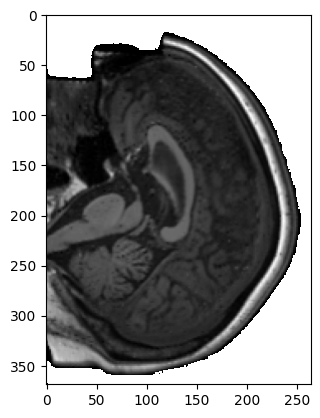

In [76]:
test_image = Image.open(file_list[0]).convert("L")
image_arr = np.array(filter_func_new(test_image))
plt.imshow(image_arr, cmap='gray')

In [56]:
og_mask = np.array(remove(test_image))[:,:,3]



In [70]:
mask = og_mask.copy()
mask[mask > 0] = 1
float_mask = mask.astype(float)
float_mask[mask == 0.0] = np.nan

In [71]:
np.unique(float_mask)

array([ 1., nan])

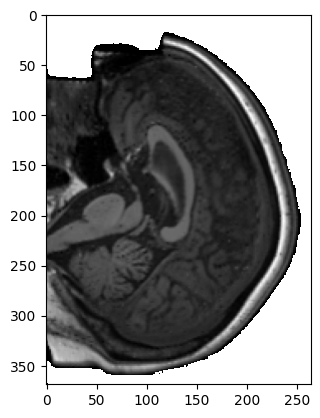

In [ ]:
plt.imshow(float_mask*test_image, cmap='gray')

# Gray

In [ ]:
gray_wv = convert_to_wavelet_basis(data_dir, "gray", debug=True, image_func = filter_func)
gray_wv["unfiltered_data_size"] = gray_wv["data"].apply(lambda x: len(x))
gray_wv["data"] = gray_wv["data"].apply(lambda x: x[~np.isnan(x)])
gray_wv["data_size"] = gray_wv["data"].apply(lambda x: len(x))
gray_wv

9 layers being used


100%|██████████| 1000/1000 [00:08<00:00, 115.98it/s]


,channel,layer,frequency,orientation,data,unfiltered_data_size,data_size
0,gray,1,0.110679,L1,[],2000,0
1,gray,2,0.124514,D,[],4000,0
2,gray,2,0.124514,H,[],4000,0
3,gray,2,0.124514,V,[],4000,0
4,gray,3,0.142301,D,"[-356.40625000000045, -389.6484375000007, -628...",9000,791
5,gray,3,0.142301,H,"[-1128.5937500000011, -1473.6640625000014, -13...",9000,791
6,gray,3,0.142301,V,"[-116.64062499999955, -250.66406250000045, -8....",9000,791
7,gray,4,0.166018,D,"[-101.42187499999999, 184.96875000000028, -554...",30000,11315
8,gray,4,0.166018,H,"[161.60937500000003, -788.7500000000007, 392.8...",30000,11315
9,gray,4,0.166018,V,"[497.54687500000045, -96.93750000000023, -468....",30000,11315


In [ ]:
gray_df = pd.DataFrame(columns = ["Layer", "First", "Second", "KS_Stat", "Pvalue"])
for i in range(2, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    names = layer_df["orientation"].to_list()
    ks_df = ksCombinations(data, layer_df["orientation"].to_list(), i).sort_values(["Layer", "KS_Stat"])
    gray_df = pd.concat([gray_df, ks_df], axis = 0)
gray_df

/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_48980/4190067360.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ksres = stats.ks_2samp(samps[i], samps[j])
/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_48980/4190067360.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ksres = stats.ks_2samp(samps[i], samps[j])
/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_48980/4190067360.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ksres = stats.ks_2samp(samps[i], samps[j])
/var/folders/0c/5hhs4r6n7pnc4jcl295d7j_c0000gn/T/ipykernel_48980/1887393883.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a f

,Layer,First,Second,KS_Stat,Pvalue
0,2,D,H,NaN,NaN
1,2,D,V,NaN,NaN
2,2,H,V,NaN,NaN
1,3,D,V,0.551724,2.099015e-04
0,3,D,H,0.827586,3.047910e-10
2,3,H,V,0.931034,1.099535e-13
0,4,D,H,0.079205,2.987700e-25
2,4,H,V,0.155333,3.387817e-96
1,4,D,V,0.198067,1.537289e-156
2,5,H,V,0.070243,1.304316e-107


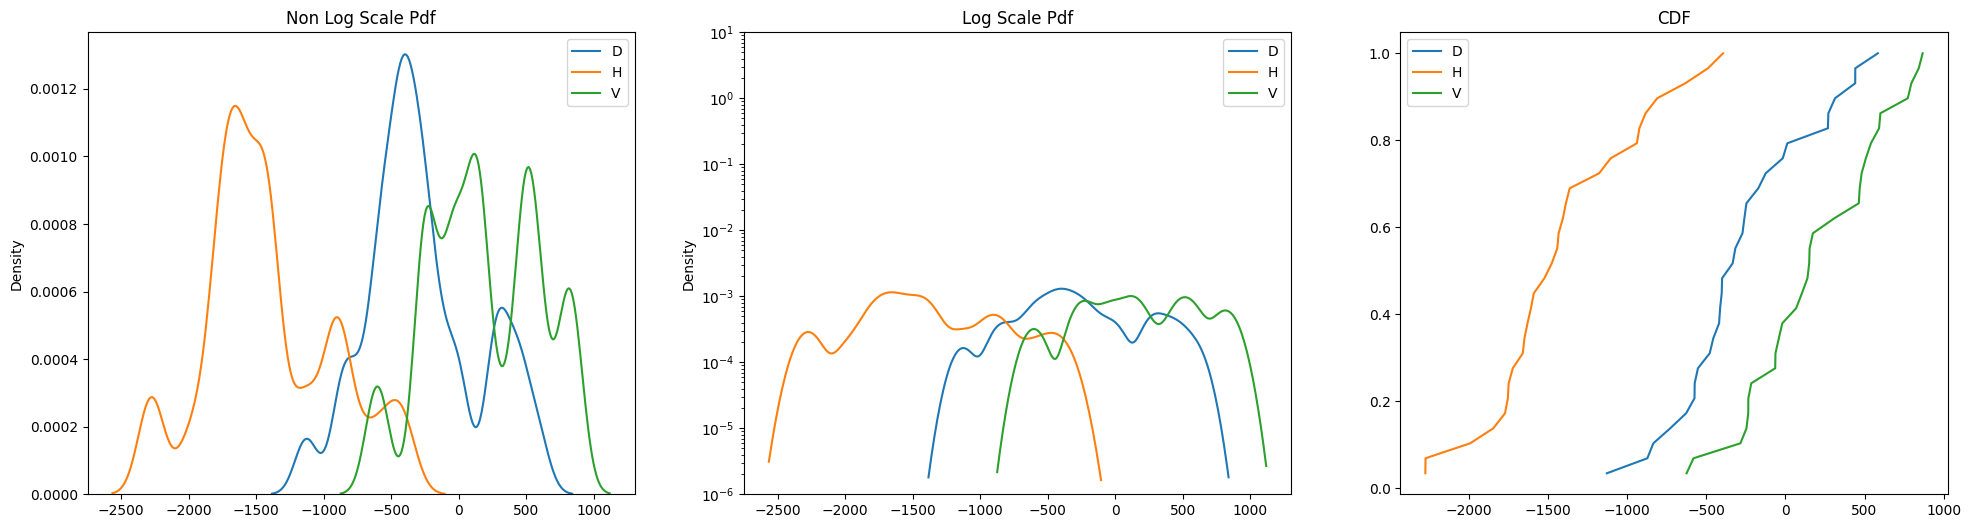

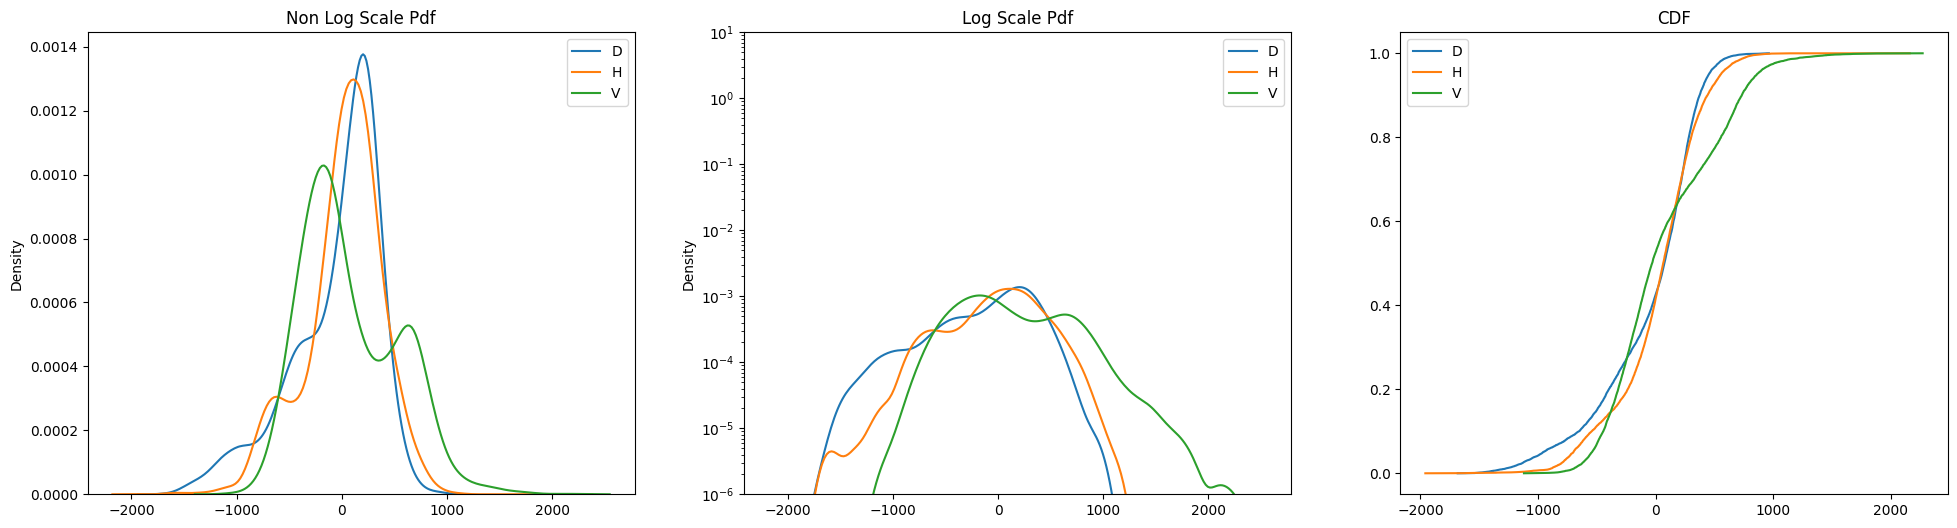

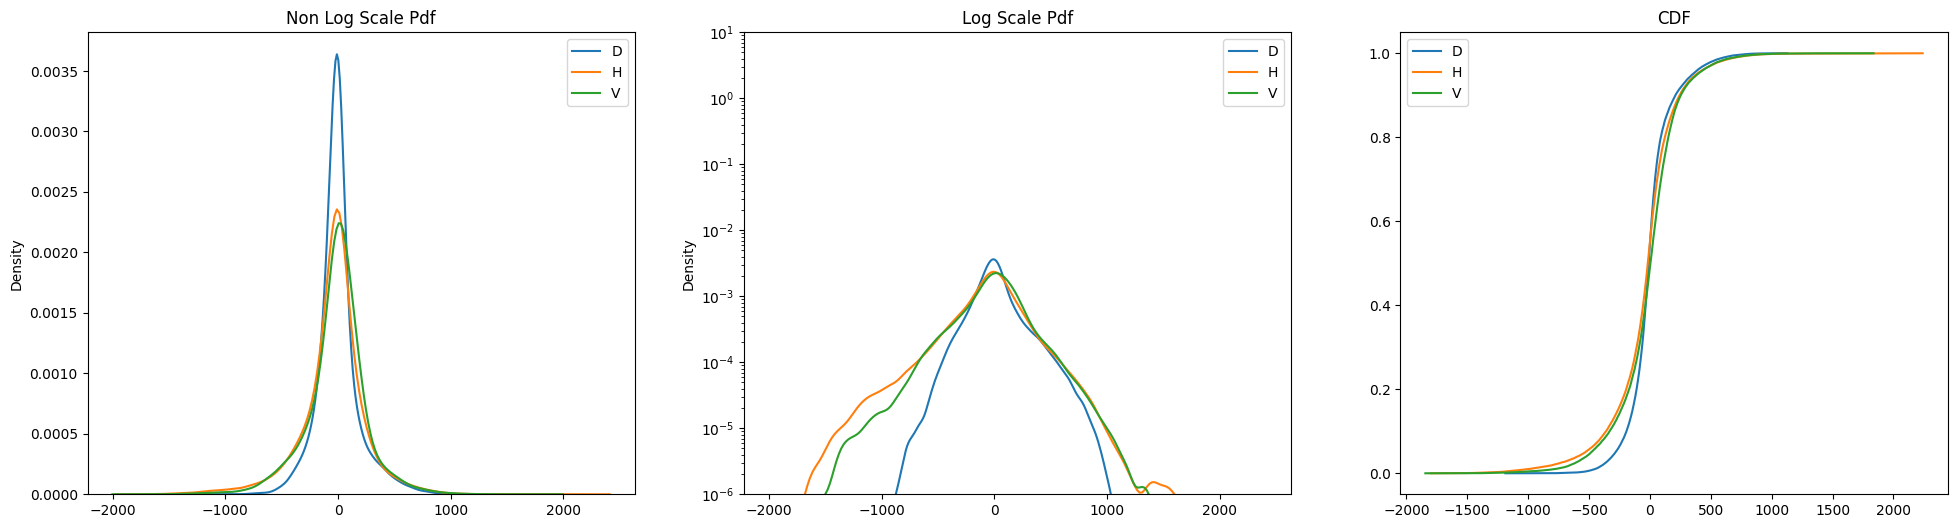

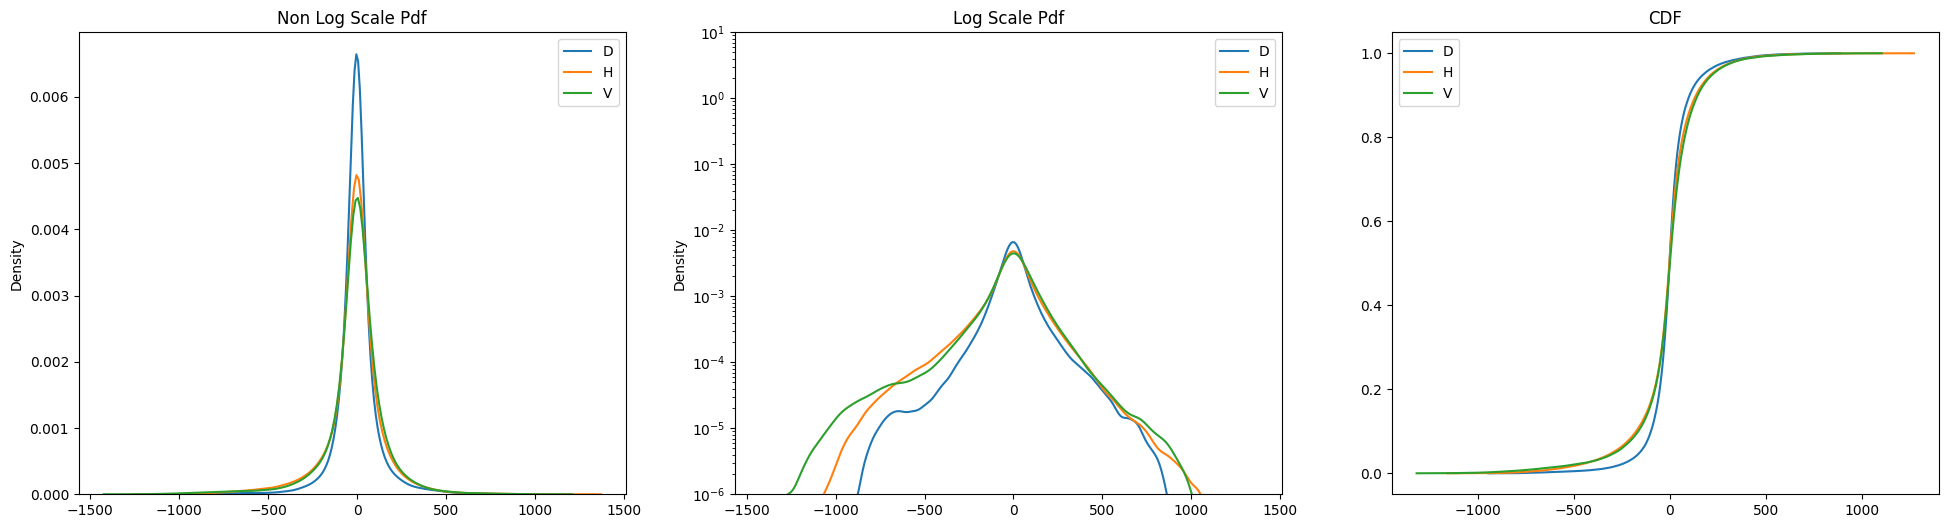

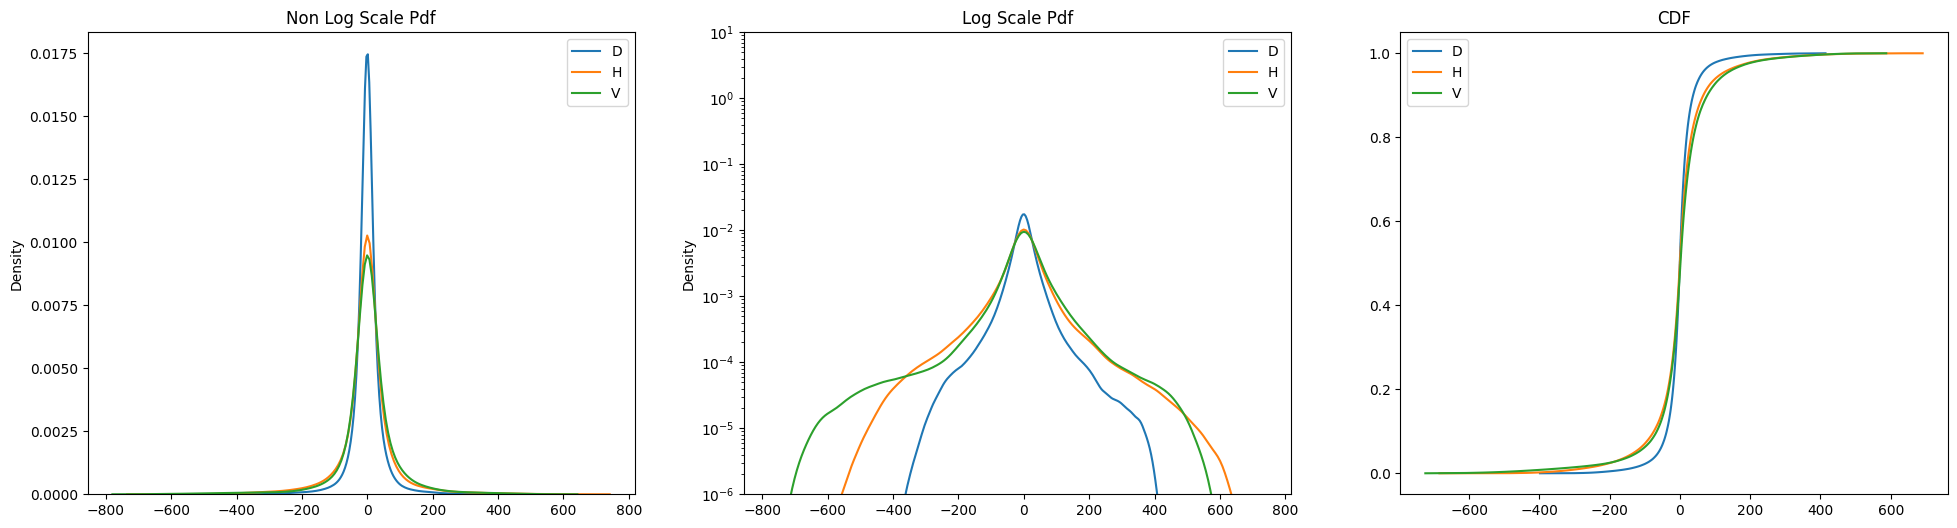

In [ ]:
for i in range(3, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    multiSampleComparisonPlots(data,  layer_df["orientation"].to_list(), bw =0.2)

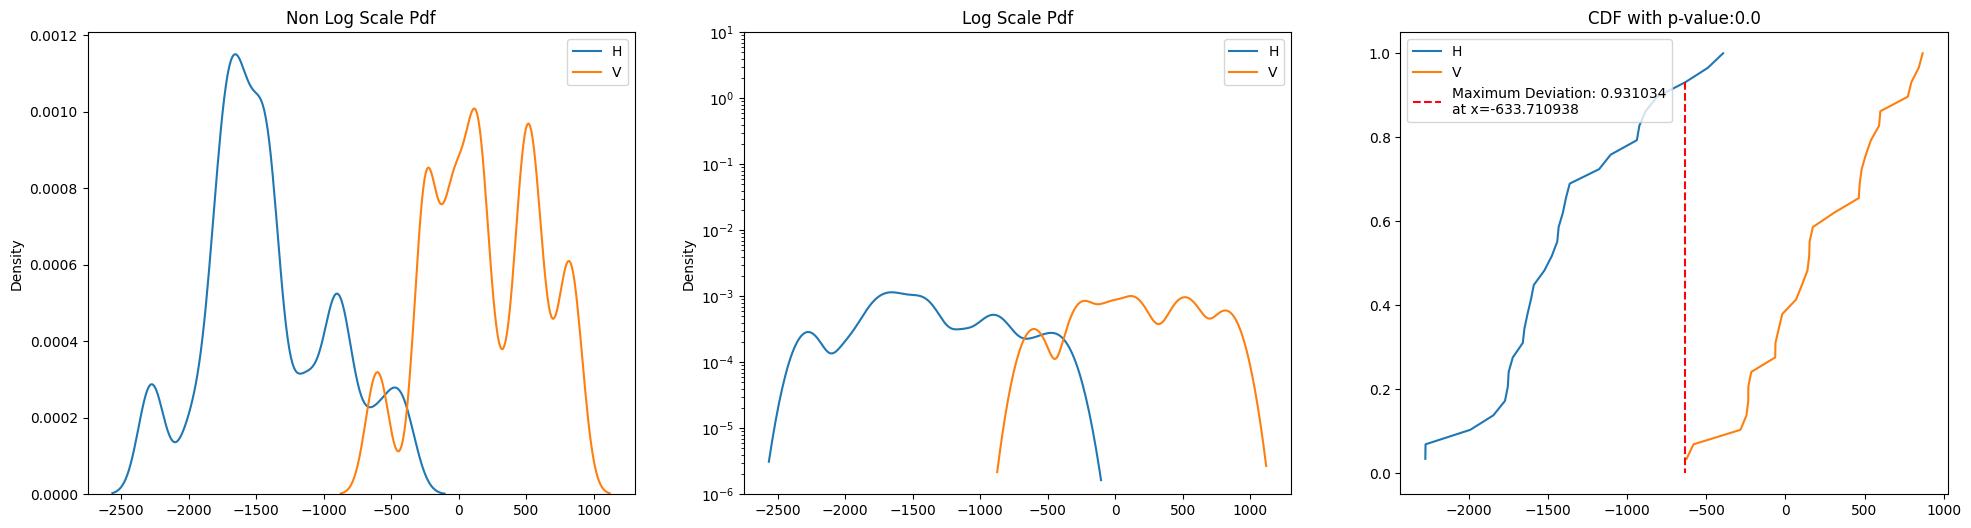

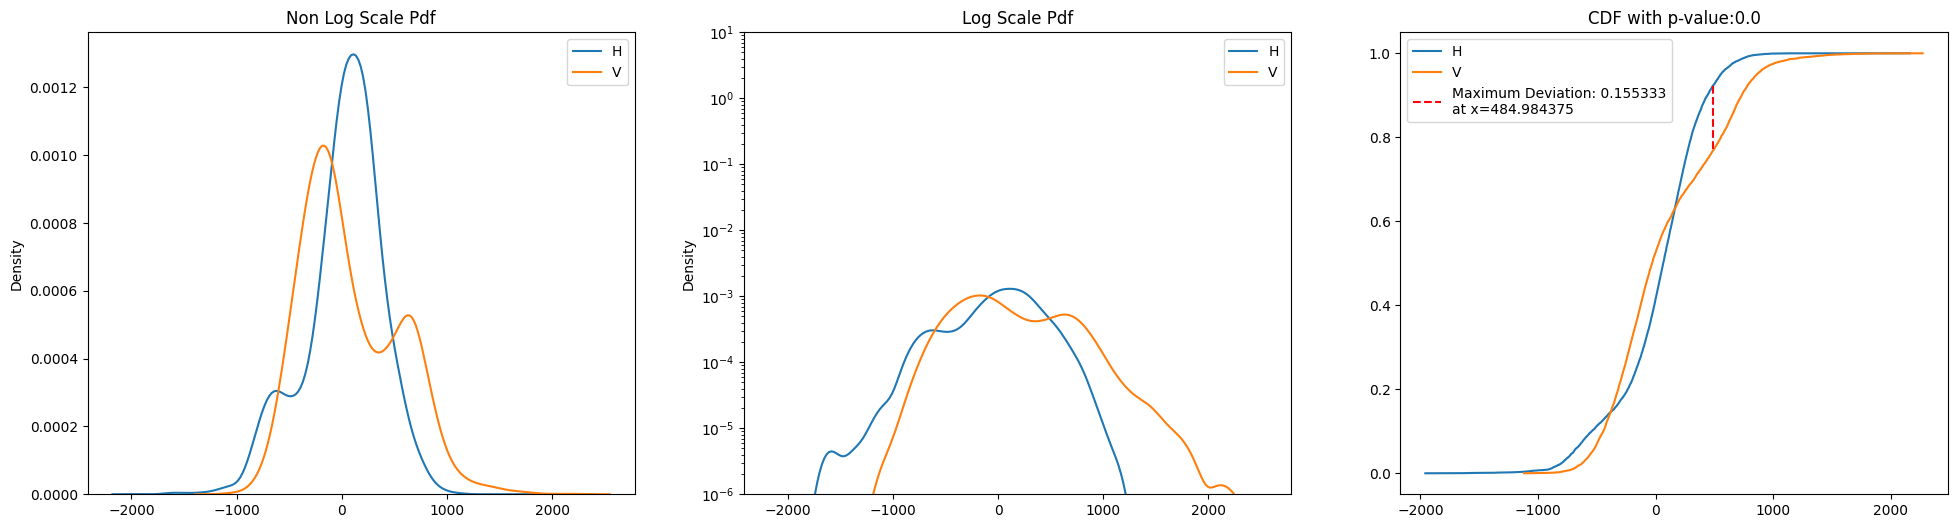

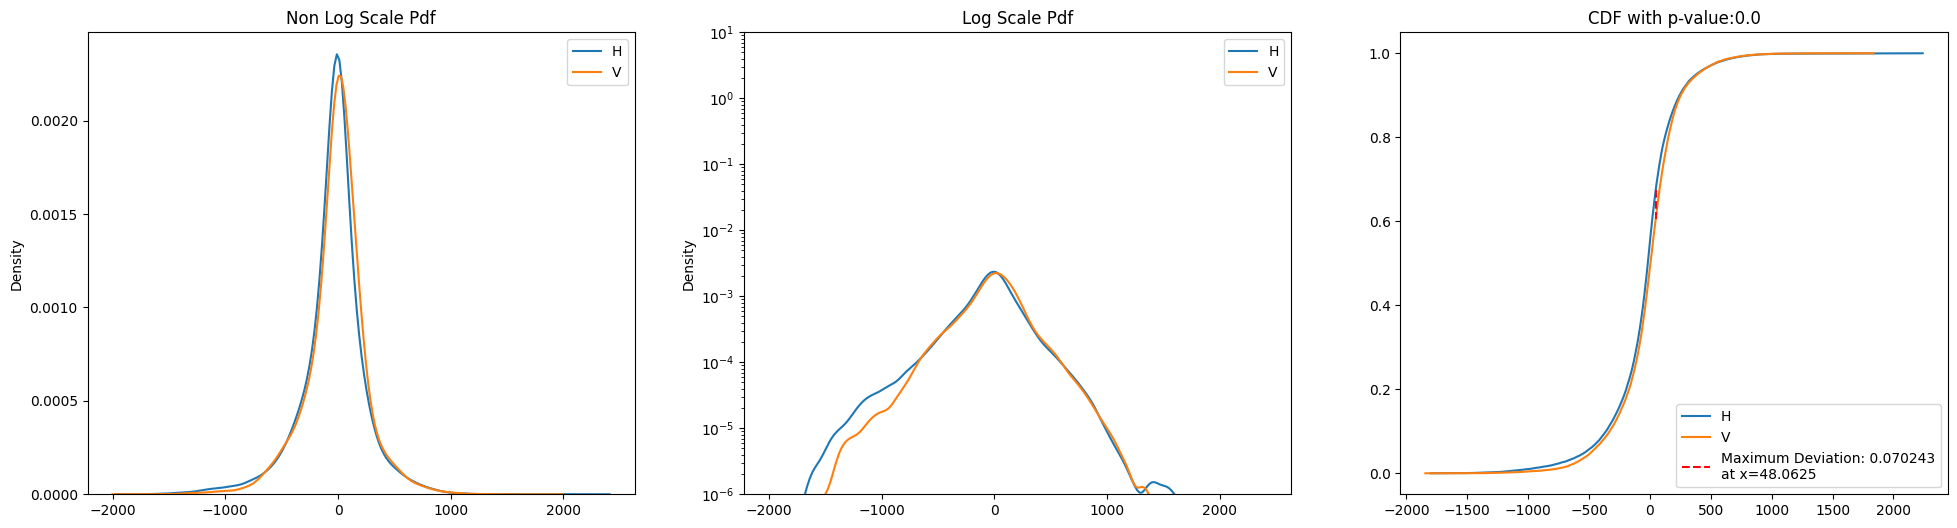

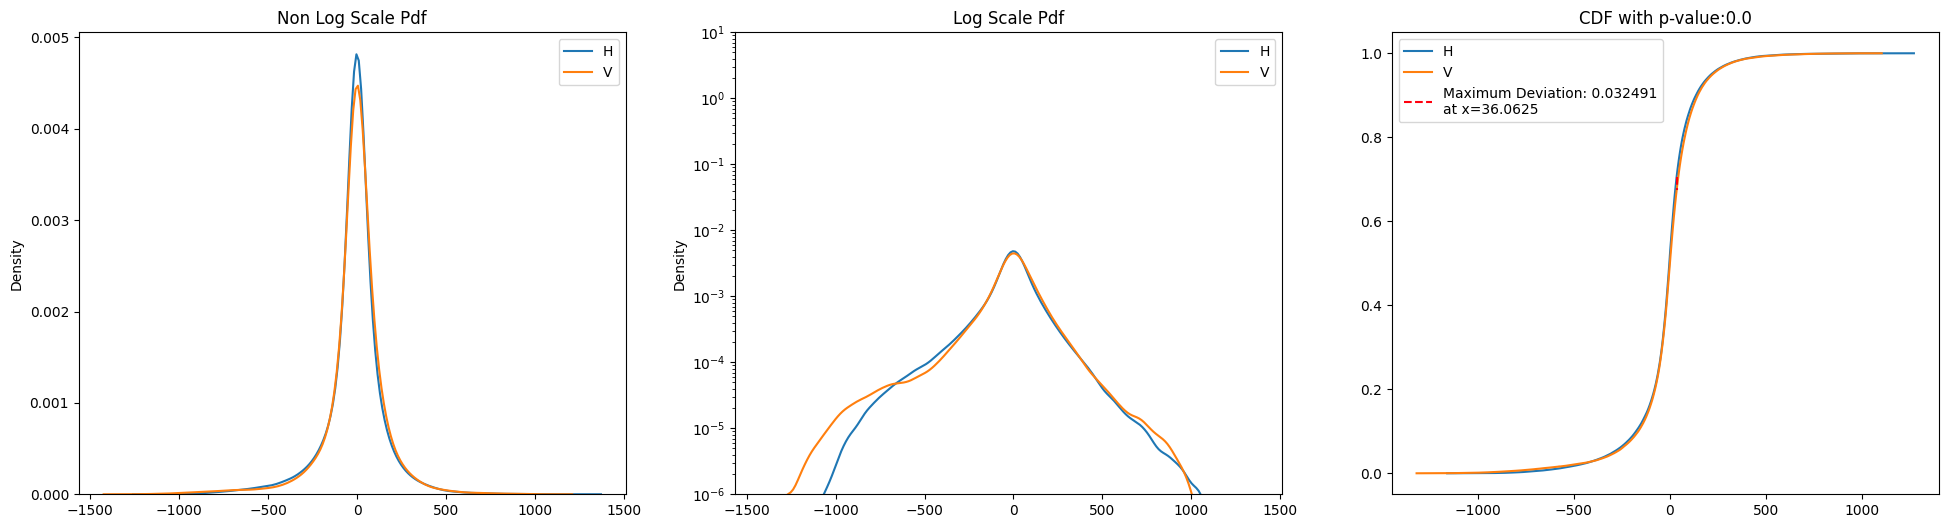

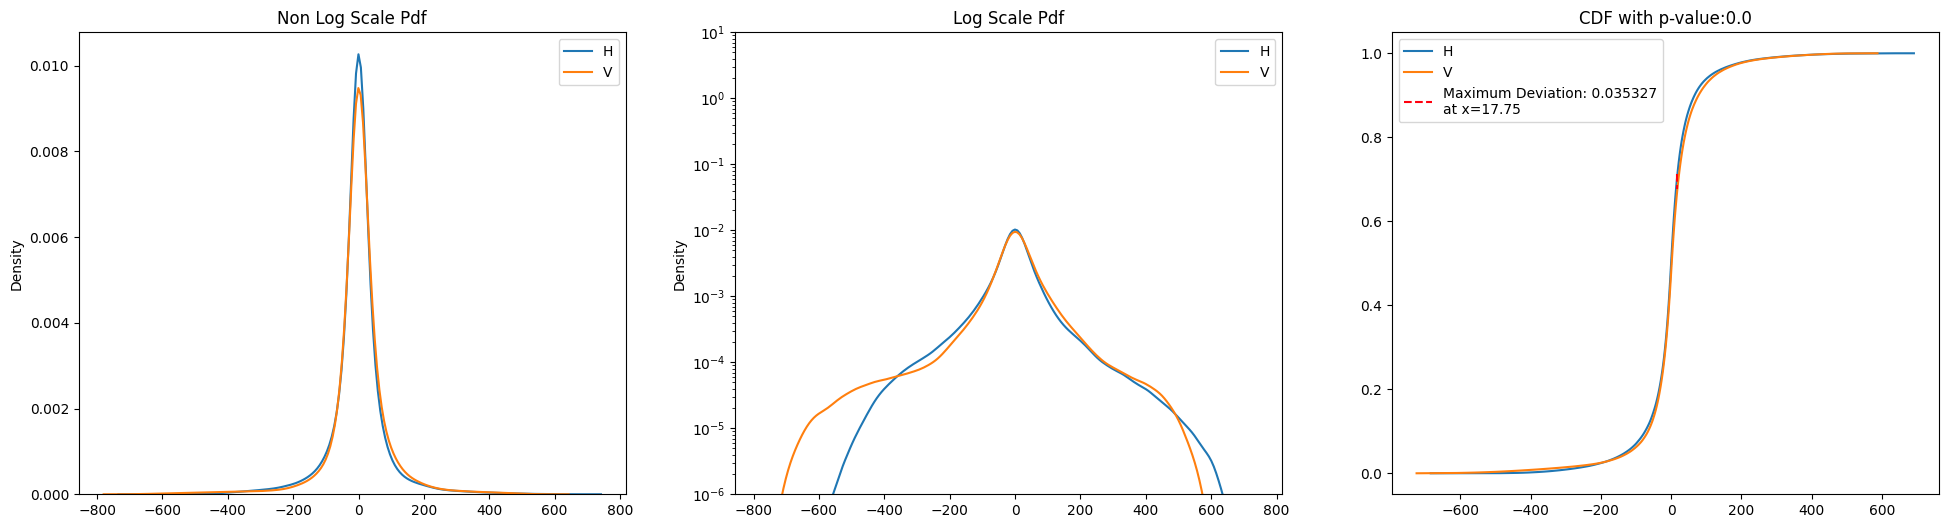

In [ ]:
for i in range(3, LAYER_MAX):
    layer_df = gray_wv[gray_wv["layer"] == i]
    data = layer_df["data"].to_list()
    first_samp = layer_df[layer_df["orientation"] == "H"]["data"].iloc[0]
    second_samp = layer_df[layer_df["orientation"] == "V"]["data"].iloc[0]
    twoSampleComparisonPlots(first_samp, second_samp, samp1name="H", samp2name= "V")